# Agricultural Emissions Regression Project


<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview](#chapter1)
* <b>[2. Importing Packages](#chapter2)
* <b>[3. Loading Data](#chapter3)
* <b>[4. Data Cleaning](#chapter4)
* <b>[5. Exploratory Data Analysis (EDA)](#chapter5)
* <b>[6. Regression Models](#chapter6)
* <b>[7. Conclusion](#chapter7)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

## 2. Importing Packages <a class="anchor" id="chapter2"></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

## 3. Loading Data <a class="anchor" id="chapter3"></a>

In [2]:
df = pd.read_csv("co2_emissions_from_agri.csv", index_col=False)

In [6]:
pd.set_option("display.max_columns", None)
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,0.0000,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.997000,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,0.0000,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.853900,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,0.0000,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.492900,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,0.0000,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.055900,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,0.0000,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.126900,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.07440,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.77590,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.51070,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.82090,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


### _Insights_
6965 rows × 31 columns

Area - categorical

Year - time series

Need to understand units of measurement for different columns, non standardised data

Some columns with zero values - drained organic soils, net forest conversion, fires in organic soils, fires in humid tropical forests

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

#### _Insights_
31 columns, of which:
- Area is type object (categorical)
- Year is type int64 (categorical, time series)
- Remaining 29 columns are type float64 (numerical)

Several columns have a Non-null Count < 6965

Column names have a mixed case, will need renaming

## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

In [11]:
# fix column names
def rename_columns(df):
    '''
    Apply transformations to column names.

    Parameters:
    df (pandas.DataFrame): The DataFrame for which columns are to be renamed.

    Returns:
    The dataframe with the renamed colums
    '''
    df.columns = (df.columns
                    .str.lower()  # convert to lowercase
                    .str.replace(' ', '_')  # replace spaces with underscores
                    .str.replace('_-_', '_')  # replace '_-_' with '_'
                    .str.replace('°c', '')  # remove deg c 
                    .str.replace('_(co2)', '') # remove co2
                    .str.strip('_')  # remove any leading or trailing underscores
                 )
    return df

rename_columns(df)


,area,year,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils,pesticides_manufacturing,food_transport,forestland,net_forest_conversion,food_household_consumption,food_retail,on-farm_electricity_use,food_packaging,agrifood_systems_waste_disposal,food_processing,fertilizers_manufacturing,ippu,manure_applied_to_soils,manure_left_on_pasture,manure_management,fires_in_organic_soils,fires_in_humid_tropical_forests,on-farm_energy_use,rural_population,urban_population,total_population_male,total_population_female,total_emission,average_temperature
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,0.0000,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.997000,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,0.0000,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.853900,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,0.0000,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.492900,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,0.0000,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.055900,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,0.0000,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.126900,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.07440,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.77590,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.51070,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.82090,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [12]:
# re-examine the column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   area                             6965 non-null   object 
 1   year                             6965 non-null   int64  
 2   savanna_fires                    6934 non-null   float64
 3   forest_fires                     6872 non-null   float64
 4   crop_residues                    5576 non-null   float64
 5   rice_cultivation                 6965 non-null   float64
 6   drained_organic_soils            6965 non-null   float64
 7   pesticides_manufacturing         6965 non-null   float64
 8   food_transport                   6965 non-null   float64
 9   forestland                       6472 non-null   float64
 10  net_forest_conversion            6472 non-null   float64
 11  food_household_consumption       6492 non-null   float64
 12  food_retail         

In [46]:
# examine categorical values
print("Area count", df['area'].unique().size) 
print("Year count", df['year'].unique().size) 


Area count 236
Year count 31


#### _Insights_
Column names have been standardised as follows:
- lower snake case
- remove units of measurement like degrees celsious or co2
- remove dashes '-'


In [13]:
# missing values
df.isnull().sum()

# duplicated rows - none
# df.duplicated().sum()

area                                  0
year                                  0
savanna_fires                        31
forest_fires                         93
crop_residues                      1389
rice_cultivation                      0
drained_organic_soils                 0
pesticides_manufacturing              0
food_transport                        0
forestland                          493
net_forest_conversion               493
food_household_consumption          473
food_retail                           0
on-farm_electricity_use               0
food_packaging                        0
agrifood_systems_waste_disposal       0
food_processing                       0
fertilizers_manufacturing             0
ippu                                743
manure_applied_to_soils             928
manure_left_on_pasture                0
manure_management                   928
fires_in_organic_soils                0
fires_in_humid_tropical_forests     155
on-farm_energy_use                  956


In [15]:
# create a dataframe to examine the null value counts
def view_columns_with_null(df, threshold):
    null_counts = df.isnull().sum()
    null_columns = null_counts[null_counts > threshold]
    null_columns_df = null_columns.to_frame(name='null_count')
    # null_columns_df
    print(null_columns_df.to_string())
    
view_columns_with_null(df, 0)

                                 null_count
savanna_fires                            31
forest_fires                             93
crop_residues                          1389
forestland                              493
net_forest_conversion                   493
food_household_consumption              473
ippu                                    743
manure_applied_to_soils                 928
manure_management                       928
fires_in_humid_tropical_forests         155
on-farm_energy_use                      956


### _Insights_
Eleven of the 29 numeric columns contain nulls. 

Some of the columns contain a small number of nulls e.g savanna_fires (31), forest_fires (93), whilst other columns have a large number e.g crop_residues (1389), manure_applied_to_soils (928), manure_management (928)

In [57]:
# look at some columns with null values
rows_with_nulls_in_column = df[df['savanna_fires'].isnull()]
rows_with_nulls_in_column

,area,year,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils,pesticides_manufacturing,food_transport,forestland,net_forest_conversion,food_household_consumption,food_retail,on-farm_electricity_use,food_packaging,agrifood_systems_waste_disposal,food_processing,fertilizers_manufacturing,ippu,manure_applied_to_soils,manure_left_on_pasture,manure_management,fires_in_organic_soils,fires_in_humid_tropical_forests,on-farm_energy_use,rural_population,urban_population,total_population_male,total_population_female,total_emission,average_temperature
2835,Holy See,1990,NaN,NaN,NaN,9616.267306,0.0,11.481085,26.262663,0.0,0.0,0.0018,0.0466,112.135517,67.631366,65.072347,451.196291,2361.124955,0.6382,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,768.0,340.0,370.0,18688.406793,0.905583
2836,Holy See,1991,NaN,NaN,NaN,9654.499823,0.0,11.481085,26.262663,0.0,0.0,0.0018,0.0457,112.135517,67.631366,65.072347,451.196291,2361.124955,0.6414,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,774.0,330.0,360.0,18726.641610,-0.098083
2837,Holy See,1992,NaN,NaN,NaN,9616.267306,0.0,11.481085,26.262663,0.0,0.0,0.0018,0.0433,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6399,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,779.0,330.0,360.0,18684.924938,0.773167
2838,Holy See,1993,NaN,NaN,NaN,9616.267306,0.0,11.481085,26.262663,0.0,0.0,0.0107,0.0230,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6012,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,778.0,330.0,360.0,18684.874838,0.564417
2839,Holy See,1994,NaN,NaN,NaN,9649.123125,0.0,11.481085,26.262663,0.0,0.0,0.0184,0.0254,112.135517,67.631366,65.072347,451.196291,2357.644701,0.5894,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,778.0,320.0,350.0,18717.728958,1.444500
2840,Holy See,1995,NaN,NaN,NaN,9687.355642,0.0,11.481085,26.262663,0.0,0.0,0.0024,0.0095,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6334,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,780.0,320.0,350.0,18755.973575,0.267167
2841,Holy See,1996,NaN,NaN,NaN,9687.355642,0.0,11.481085,26.262663,0.0,0.0,0.0031,0.0146,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6360,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,778.0,320.0,350.0,18755.981975,0.245167
2842,Holy See,1997,NaN,NaN,NaN,9649.123125,0.0,11.481085,26.262663,0.0,0.0,0.0029,0.0114,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6444,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,782.0,320.0,340.0,18717.754458,0.889583
2843,Holy See,1998,NaN,NaN,NaN,9649.123125,0.0,11.481085,26.262663,0.0,0.0,0.0030,0.0201,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6658,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,781.0,320.0,340.0,18717.784658,0.778250
2844,Holy See,1999,NaN,NaN,NaN,9649.123125,0.0,11.481085,26.262663,0.0,0.0,0.0025,0.0271,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6923,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,781.0,310.0,340.0,18717.817658,0.926500


### _Insights_
It is noted that several columns also contain zero. Look more closely at the zero columns

In [58]:
# update the null values to zero
df_no_nulls = df.fillna(0)

In [59]:
# look for nulls again
view_columns_with_null(df_no_nulls, 0)

Empty DataFrame
Columns: [null_count]
Index: []


In [60]:
def check_for_conditional_values(df, condition, value):
    '''
    Display the number of values in each column that matches the provided condition and value.
    Used to identify columns that contain unexpected values e.g. -1 values where the value should be nan 
    e.g check_for_conditional_values(df, "==", -1 ) will print number of records containing "-1"

    Parameters:
    df (pandas.DataFrame): The DataFrame to check for duplicate rows.
    condition:  The condition or operator to be used "<", "<=", "==", ">=", or ">" are valid
    value: The value to be used with the condition. Any integer can be used.

    Returns:
    No return value. The count of values matching the expression per column is printed to the screen.
    "e.g
    '''
    print(f"Checking columns with values {condition} {value}")
    for col in df.columns:
        if df[col].dtype in ["float64", "int64"]:
            if condition == "<":
                matching_values = df[col] < value
            elif condition == "<=":
                matching_values = df[col] <= value
            elif condition == "==":
                matching_values = df[col] == value
            elif condition == ">=":
                matching_values = df[col] >= value
            elif condition == ">":
                matching_values = df[col] > value
            else:
                print("Invalid conditional operator specified")
                return
            # print(matching_values)
            count_matches = matching_values.sum()
        
            if count_matches > 0:
                print(f"{col} has {count_matches} values matching condition {condition} {value}")
            else:
                pass

In [77]:
# looking for negative values
check_for_conditional_values(df_no_nulls, "<", 0)

# inspect forestland values < 0
df_no_nulls[df_no_nulls['forestland'] < 0]

Checking columns with values < 0
forestland has 4224 values matching condition < 0
total_emission has 238 values matching condition < 0
average_temperature has 288 values matching condition < 0


,area,year,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils,pesticides_manufacturing,food_transport,forestland,net_forest_conversion,food_household_consumption,food_retail,on-farm_electricity_use,food_packaging,agrifood_systems_waste_disposal,food_processing,fertilizers_manufacturing,ippu,manure_applied_to_soils,manure_left_on_pasture,manure_management,fires_in_organic_soils,fires_in_humid_tropical_forests,on-farm_energy_use,rural_population,urban_population,total_population_male,total_population_female,total_emission,average_temperature
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,0.000,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.997000,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,0.0000,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,0.000,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.853900,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,0.0000,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,0.000,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.492900,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,0.0000,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,0.000,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.055900,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,0.0000,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,0.000,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.126900,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,0.0000,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6940,Zimbabwe,1996,2898.6136,221.0813,156.3792,0.4018,0.0,17.000000,262.0756,-269.3677,10670.887,168.9277,246.6960,782.4181,48.677000,901.2757,7.29820,526.737042,1090.9720,82.2644,2586.0399,246.4576,0.0,0.0,1792.7558,7817179.0,3701083.0,5316578.0,5861593.0,22437.590242,-0.174083
6941,Zimbabwe,1997,2705.2116,408.8078,132.5745,0.4253,0.0,22.000000,262.3961,-269.3677,10670.887,164.5750,266.6222,748.1845,38.632300,932.5070,10.94730,526.737042,1121.6400,81.0095,2565.7747,243.5653,0.0,0.0,1635.3614,7900229.0,3809768.0,5404409.0,5957992.0,22268.490842,0.056250
6942,Zimbabwe,1998,2897.9623,473.0385,109.8417,0.3920,0.0,107.000000,259.9821,-269.3677,10670.887,199.1753,181.1367,1045.7414,46.261500,942.7492,14.59640,1159.124300,1082.2520,91.9839,2720.7268,255.5813,0.0,0.0,1672.7223,7975688.0,3917584.0,5492694.0,6055671.0,23661.787000,0.644667
6943,Zimbabwe,1999,2715.5595,305.4634,133.1283,0.4998,0.0,23.000000,360.5496,-269.3677,10670.887,186.8144,177.3128,1085.7144,43.256100,952.9303,18.24560,526.737042,1051.9350,89.8685,2889.5980,274.0318,0.0,0.0,1960.9770,8041349.0,4023188.0,5570832.0,6145623.0,23197.140842,0.112833


### _Insights_
Negative values for forestland and total_emissions can be accounted for as forests are carbon sinks, and given a large enough area that is forested there will be negative carbon emissions attributable to forests.

Similarly some countries may have negative total emissions due to their lower carbon emissions being offset by forested area. 

In [79]:
check_for_conditional_values(df_no_nulls, "==", -1)
check_for_conditional_values(df_no_nulls, "==", 0)

Checking columns with values == -1
Checking columns with values == 0
savanna_fires has 2208 values matching condition == 0
forest_fires has 2939 values matching condition == 0
crop_residues has 1389 values matching condition == 0
rice_cultivation has 108 values matching condition == 0
drained_organic_soils has 3853 values matching condition == 0
pesticides_manufacturing has 670 values matching condition == 0
forestland has 2145 values matching condition == 0
net_forest_conversion has 3255 values matching condition == 0
food_household_consumption has 479 values matching condition == 0
food_retail has 1 values matching condition == 0
on-farm_electricity_use has 1 values matching condition == 0
food_packaging has 1 values matching condition == 0
ippu has 901 values matching condition == 0
manure_applied_to_soils has 928 values matching condition == 0
manure_management has 928 values matching condition == 0
fires_in_organic_soils has 6656 values matching condition == 0
fires_in_humid_tropi

In [84]:
df.shape
print(f"Net forest conversion 0 value %", 3255 /6965 * 100)
print(f"Drained organic soils 0 value %", 3853/6965 * 100)
print(f"Fires in organic soils 0 value %", 6656 /6965 * 100)
print(f"Fires in humid tropical forests 0 value %", 4632/6965 * 100)


Net forest conversion 0 value % 46.733668341708544
Drained organic soils 0 value % 55.3194544149318
Fires in organic soils 0 value % 95.5635319454415
Fires in humid tropical forests 0 value % 66.50394831299354


### _Insights_
There are a number of features for which there is not enough data (more observations have zero values than not). 

These features could be dropped:
- drained_organic_soils 
- fires_in_organic_soils
- fires_in_humid_tropical_forests 

In [86]:
# drop columns where zero values > 50%
columns_to_drop = ['drained_organic_soils', 'fires_in_organic_soils', 'fires_in_humid_tropical_forests']
df_after_drop = df_no_nulls.drop(columns=columns_to_drop)
df_after_drop.shape

(6965, 28)

In [88]:
# check for duplicated values
df_after_drop.duplicated().sum()

0

### _Insights_
There were no duplicate values

In [91]:
# data is cleaned and can now be saved
df_after_drop.to_csv('co2_emissions_cleaned.csv', index=False)

## 5. Exploratory Data Analysis <a class="anchor" id="chapter5"></a>

In [2]:
# load the clean data
df = pd.read_csv("co2_emissions_cleaned.csv", index_col=False)

In [6]:
# check basic structure again

# number of rows and columns
df.shape

# overview of the dataset, including column types, non-null counts, and memory usage
df.info()

# summary statistics for numerical columns
df.describe()

# summary statistics for categorical columns
#df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   area                             6965 non-null   object 
 1   year                             6965 non-null   int64  
 2   savanna_fires                    6965 non-null   float64
 3   forest_fires                     6965 non-null   float64
 4   crop_residues                    6965 non-null   float64
 5   rice_cultivation                 6965 non-null   float64
 6   pesticides_manufacturing         6965 non-null   float64
 7   food_transport                   6965 non-null   float64
 8   forestland                       6965 non-null   float64
 9   net_forest_conversion            6965 non-null   float64
 10  food_household_consumption       6965 non-null   float64
 11  food_retail                      6965 non-null   float64
 12  on-farm_electricity_

,year,savanna_fires,forest_fires,crop_residues,rice_cultivation,pesticides_manufacturing,food_transport,forestland,net_forest_conversion,food_household_consumption,...,manure_applied_to_soils,manure_left_on_pasture,manure_management,on-farm_energy_use,rural_population,urban_population,total_population_male,total_population_female,total_emission,average_temperature
count,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6.965000e+03,6965.000000,...,6965.000000,6965.000000,6965.000000,6965.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1183.101572,907.027206,799.538604,4259.666673,333.418393,1939.581760,-16566.355335,1.635947e+04,4518.376433,...,800.217224,3518.026573,1961.782260,2595.976217,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5235.195713,3696.662005,3334.783518,17613.825187,1429.159367,5616.748808,79014.907125,9.761571e+04,24927.793561,...,3020.638840,9103.556202,7469.521165,11783.996613,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,0.000000,...,0.000000,0.000700,0.000000,0.000000,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,0.028400,181.260800,6.000000,27.958600,-2299.387200,0.000000e+00,6.089100,...,3.946700,139.669900,11.038100,5.013600,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.587000,0.416400,43.004800,534.817400,13.000000,204.962800,-30.853100,9.029000e+00,111.923100,...,72.066000,972.567400,163.463900,55.982200,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,108.361700,61.237200,264.718000,1536.640000,116.325487,1207.000900,0.000000,3.830905e+03,1238.668800,...,379.964800,2430.792600,883.170300,845.713100,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,16459.000000,67945.765000,171121.076000,1.605106e+06,466288.200700,...,34677.360300,92630.756800,70592.646500,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


area
Afghanistan                        31
Isle of Man                        31
Montserrat                         31
Morocco                            31
Mozambique                         31
                                   ..
Czechoslovakia                      3
Ethiopia PDR                        3
USSR                                2
Yugoslav SFR                        2
Pacific Islands Trust Territory     1
Name: count, Length: 236, dtype: int64


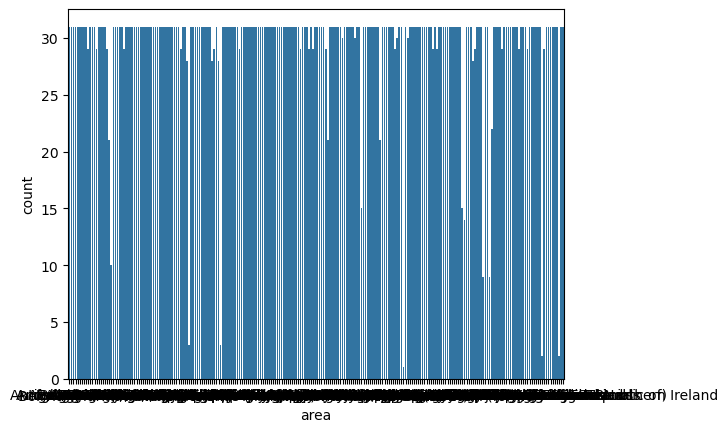

In [101]:
# set options to show all rows
pd.set_option('display.max_rows', 20)

# count unique values in each categorical column
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())

# Visualize with bar charts
for col in df.select_dtypes(include='object').columns:
    sns.countplot(x=col, data=df)
    plt.show()

In [7]:
df.select_dtypes(include='object').columns
df['area'].value_counts().sort_values(ascending=True)

area
Pacific Islands Trust Territory                  1
Yugoslav SFR                                     2
USSR                                             2
Ethiopia PDR                                     3
Czechoslovakia                                   3
                                                ..
Rwanda                                          31
Saint Helena, Ascension and Tristan da Cunha    31
Saint Kitts and Nevis                           31
Wallis and Futuna Islands                       31
China, Hong Kong SAR                            31
Name: count, Length: 236, dtype: int64

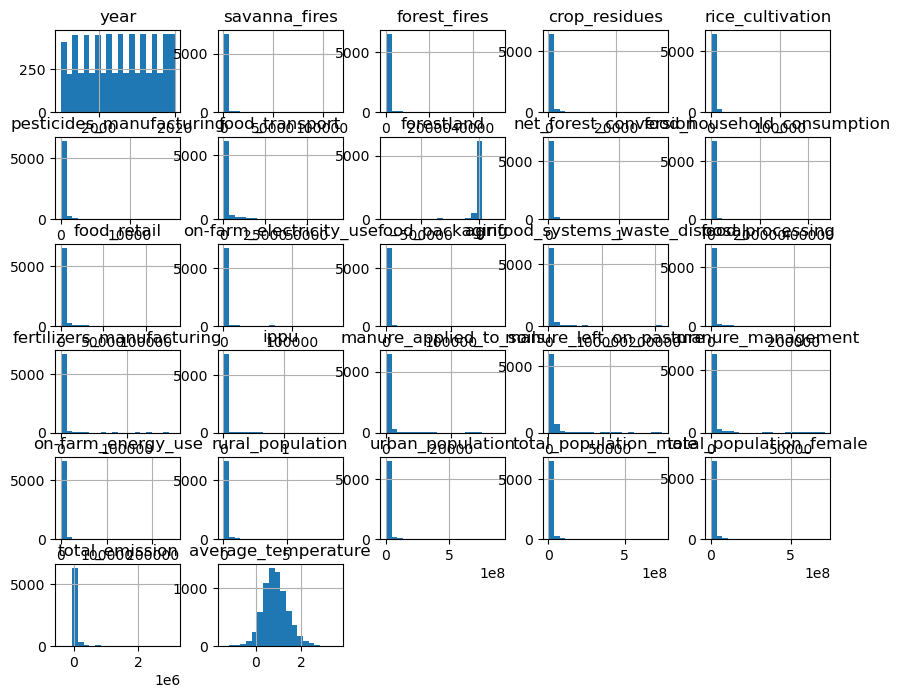

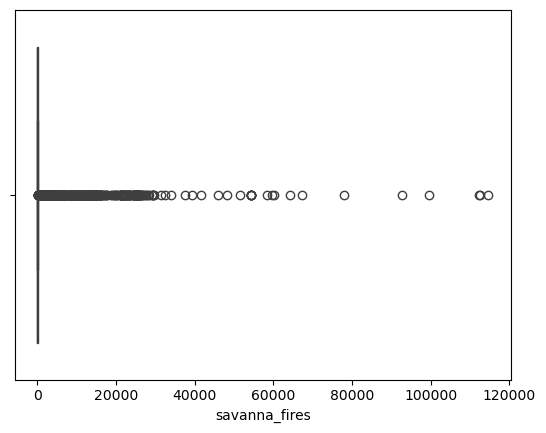

In [8]:
# Histograms for each numerical column
df.hist(figsize=(10, 8), bins=20)
plt.show()

sns.boxplot(data=df, x='savanna_fires')
plt.show()

# Boxplot to check for outliers
#for col in df.select_dtypes(include='number').columns:
#    sns.boxplot(data=df, x=col)
#    plt.show()

In [9]:
# Correlation matrix
corr_matrix = df.select_dtypes(include='number').corr()
display(corr_matrix)

# Visualize the correlation matrix
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#plt.show()

,year,savanna_fires,forest_fires,crop_residues,rice_cultivation,pesticides_manufacturing,food_transport,forestland,net_forest_conversion,food_household_consumption,...,manure_applied_to_soils,manure_left_on_pasture,manure_management,on-farm_energy_use,rural_population,urban_population,total_population_male,total_population_female,total_emission,average_temperature
year,1.000000,-0.011868,-0.008791,0.028473,0.001641,0.023444,0.060122,0.003390,-0.022858,0.055868,...,0.005722,0.025033,0.001577,-0.004969,-0.002781,0.050259,0.021208,0.021612,0.041861,0.545932
savanna_fires,-0.011868,1.000000,0.507466,0.039452,-0.030714,0.061008,0.070653,-0.062041,0.228626,0.004896,...,0.023904,0.254848,0.035607,0.023086,0.000608,0.021878,0.008596,0.011128,0.128855,-0.046773
forest_fires,-0.008791,0.507466,1.000000,0.089478,0.069993,0.053655,0.072138,-0.154880,0.422396,0.023251,...,0.089620,0.185483,0.074193,0.047762,0.078494,0.085637,0.083204,0.087110,0.239282,-0.039374
crop_residues,0.028473,0.039452,0.089478,1.000000,0.823045,0.876867,0.772158,-0.741340,0.130142,0.853820,...,0.947208,0.775167,0.968825,0.877087,0.838846,0.941262,0.912381,0.918205,0.836556,0.026126
rice_cultivation,0.001641,-0.030714,0.069993,0.823045,1.000000,0.596904,0.433016,-0.506999,0.065212,0.699180,...,0.802218,0.628801,0.800371,0.714329,0.937768,0.852414,0.935715,0.934319,0.756638,-0.022532
pesticides_manufacturing,0.023444,0.061008,0.053655,0.876867,0.596904,1.000000,0.800226,-0.694112,0.154144,0.777555,...,0.844482,0.705042,0.876443,0.814245,0.600570,0.798785,0.703552,0.712985,0.746777,0.027960
food_transport,0.060122,0.070653,0.072138,0.772158,0.433016,0.800226,1.000000,-0.703894,0.186898,0.685303,...,0.724427,0.599468,0.764189,0.714348,0.422881,0.710225,0.560014,0.573192,0.657877,0.075724
forestland,0.003390,-0.062041,-0.154880,-0.741340,-0.506999,-0.694112,-0.703894,1.000000,-0.361227,-0.688722,...,-0.765615,-0.614060,-0.727832,-0.731312,-0.483047,-0.708785,-0.593073,-0.606914,-0.644113,-0.052133
net_forest_conversion,-0.022858,0.228626,0.422396,0.130142,0.065212,0.154144,0.186898,-0.361227,1.000000,0.030826,...,0.167117,0.495633,0.085708,0.082729,0.035461,0.142110,0.081452,0.087692,0.431924,-0.027359
food_household_consumption,0.055868,0.004896,0.023251,0.853820,0.699180,0.777555,0.685303,-0.688722,0.030826,1.000000,...,0.851907,0.579233,0.832836,0.854528,0.657413,0.925216,0.796468,0.802239,0.861967,0.055602


In [17]:
# correlations
pd.set_option('display.max_rows', None)

# correlations to the dependent variable
df.select_dtypes(include='number').corr()['average_temperature'].sort_values(ascending=False)

# correlations between all variables
temp_df = df.drop('year', axis=1).select_dtypes(include='number')
temp_df.columns = temp_df.columns.str.replace('_', " ")
# display(temp_df)
corrs = temp_df.corr().round(2)

# correlations above a threshold value
corrs_thresh = corrs[np.abs(corrs) > 0.9]
#corrs_thresh_2 = corrs_thresh[np.abs(corrs_thresh) <= 0.91]

#corrs_thresh.to_csv('corrs_thresh.csv')



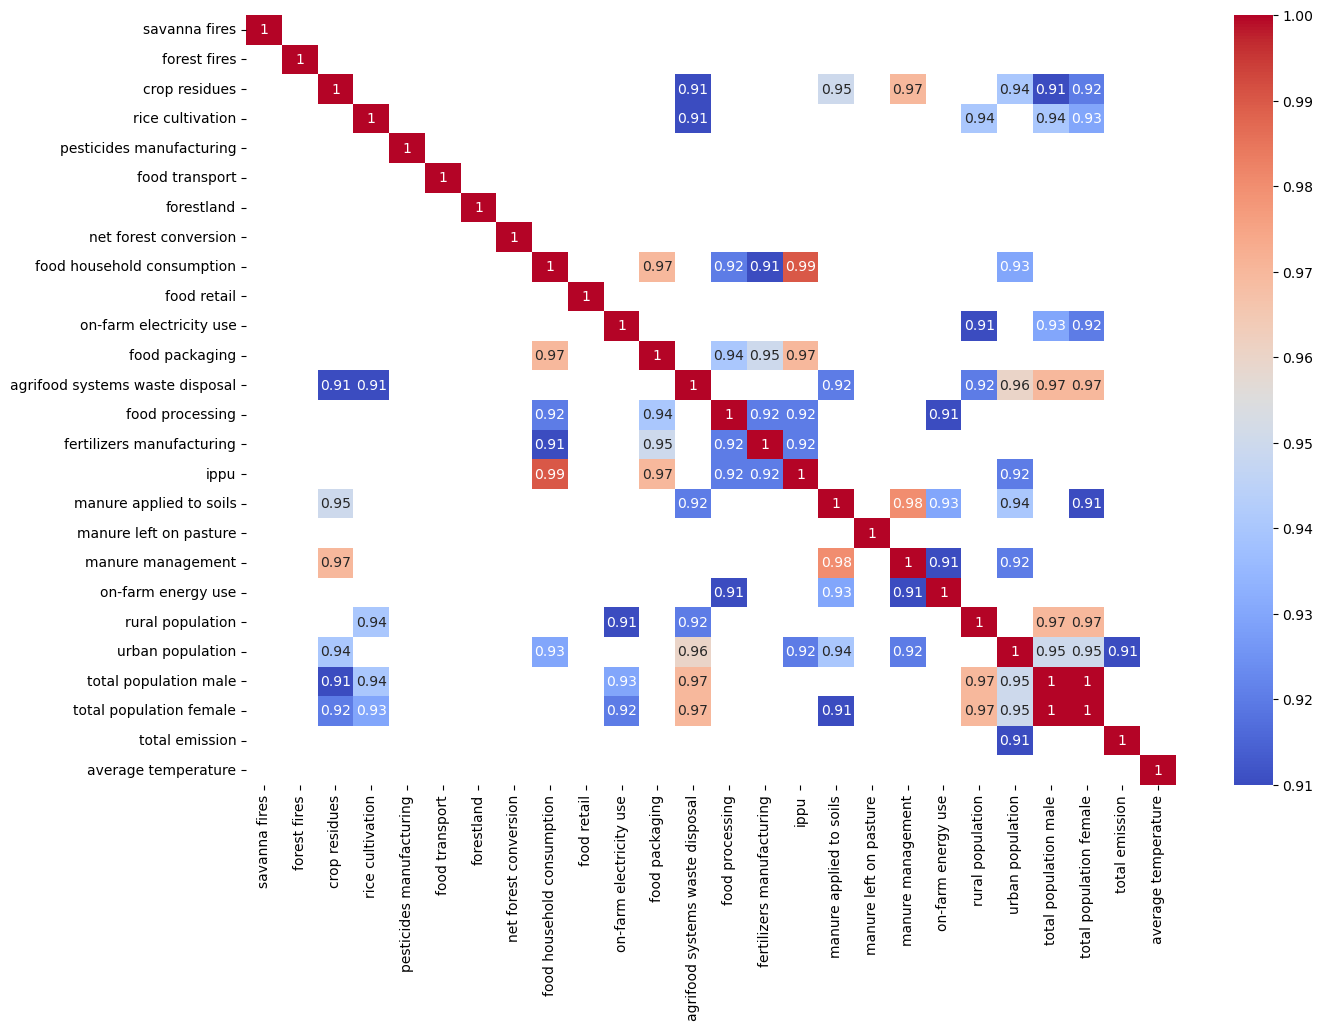

In [19]:
# Visualize the correlation matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrs_thresh, ax=ax, cmap='coolwarm', annot=True)
#sns.heatmap(corrs, annot=True, cmap='coolwarm')
plt.show()

In [132]:
# correlations to the dependent variable
df.select_dtypes(include='number').corr()['average_temperature'].sort_values(ascending=False)

average_temperature                1.000000
year                               0.545932
food_transport                     0.075724
food_retail                        0.073404
ippu                               0.062396
food_household_consumption         0.055602
food_processing                    0.053083
manure_applied_to_soils            0.042353
fertilizers_manufacturing          0.041462
food_packaging                     0.040767
on-farm_energy_use                 0.039012
urban_population                   0.036263
manure_management                  0.032787
pesticides_manufacturing           0.027960
crop_residues                      0.026126
total_emission                     0.019043
on-farm_electricity_use            0.009081
agrifood_systems_waste_disposal    0.008995
total_population_female            0.005456
total_population_male              0.003623
manure_left_on_pasture            -0.015928
rural_population                  -0.019764
rice_cultivation                

In [118]:
# correlations to the dependent variable - abs
df.select_dtypes(include='number').corr().abs()['average_temperature'].sort_values(ascending=False)

average_temperature                1.000000
year                               0.545932
food_transport                     0.075724
food_retail                        0.073404
ippu                               0.062396
food_household_consumption         0.055602
food_processing                    0.053083
forestland                         0.052133
savanna_fires                      0.046773
manure_applied_to_soils            0.042353
fertilizers_manufacturing          0.041462
food_packaging                     0.040767
forest_fires                       0.039374
on-farm_energy_use                 0.039012
urban_population                   0.036263
manure_management                  0.032787
pesticides_manufacturing           0.027960
net_forest_conversion              0.027359
crop_residues                      0.026126
rice_cultivation                   0.022532
rural_population                   0.019764
total_emission                     0.019043
manure_left_on_pasture          

Correlation analysis
- total_population_female and total_population_male perfectly correlated, remove...
- manure_management and manure_applied_to_soils highly correlated - remove...

DISCARD
-------
manure_management (correlated with manure_applied_to_soils)

food_packaging (correlated with food_household_consumption, food_processing)

food_processing (correlated with food_packaging, food_household_consumption)

total_population_male (total_population_female)


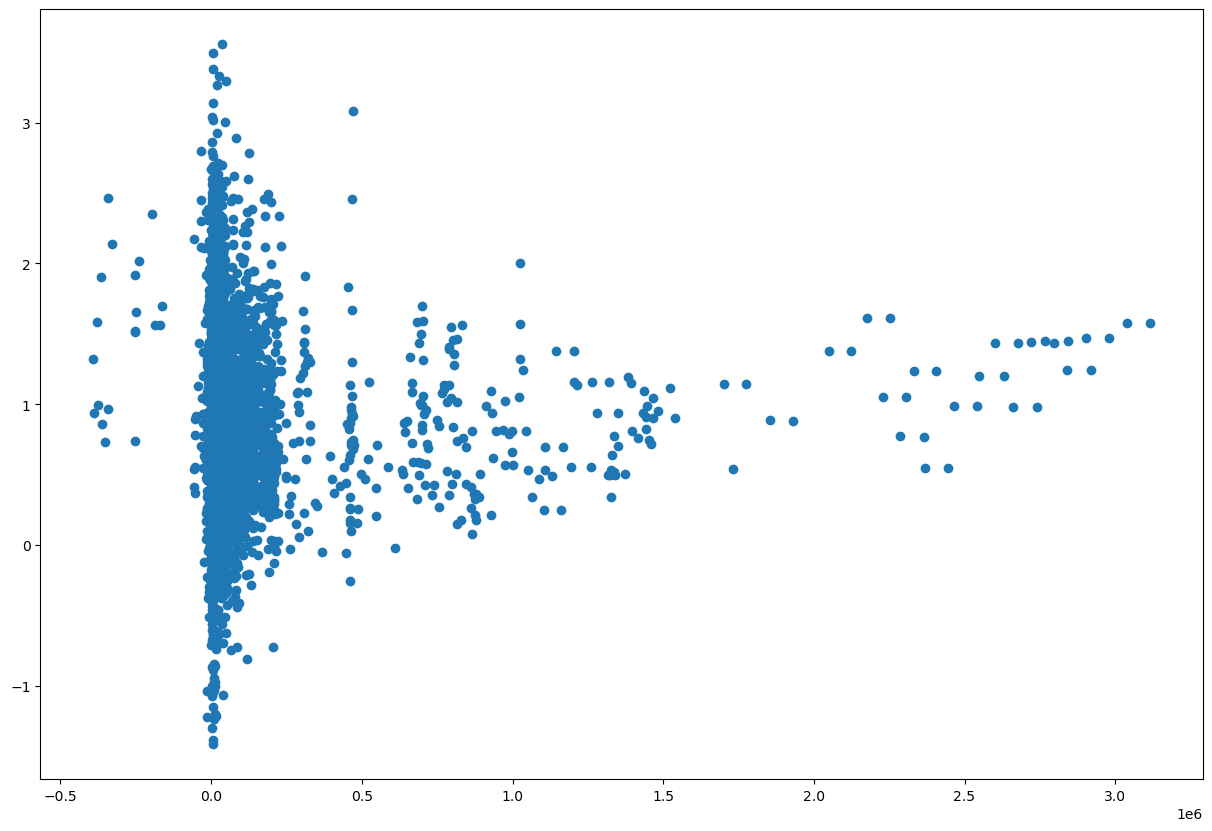

In [75]:
plt.figure(figsize=(15, 10))
plt.scatter(df.total_emission, df.average_temperature)

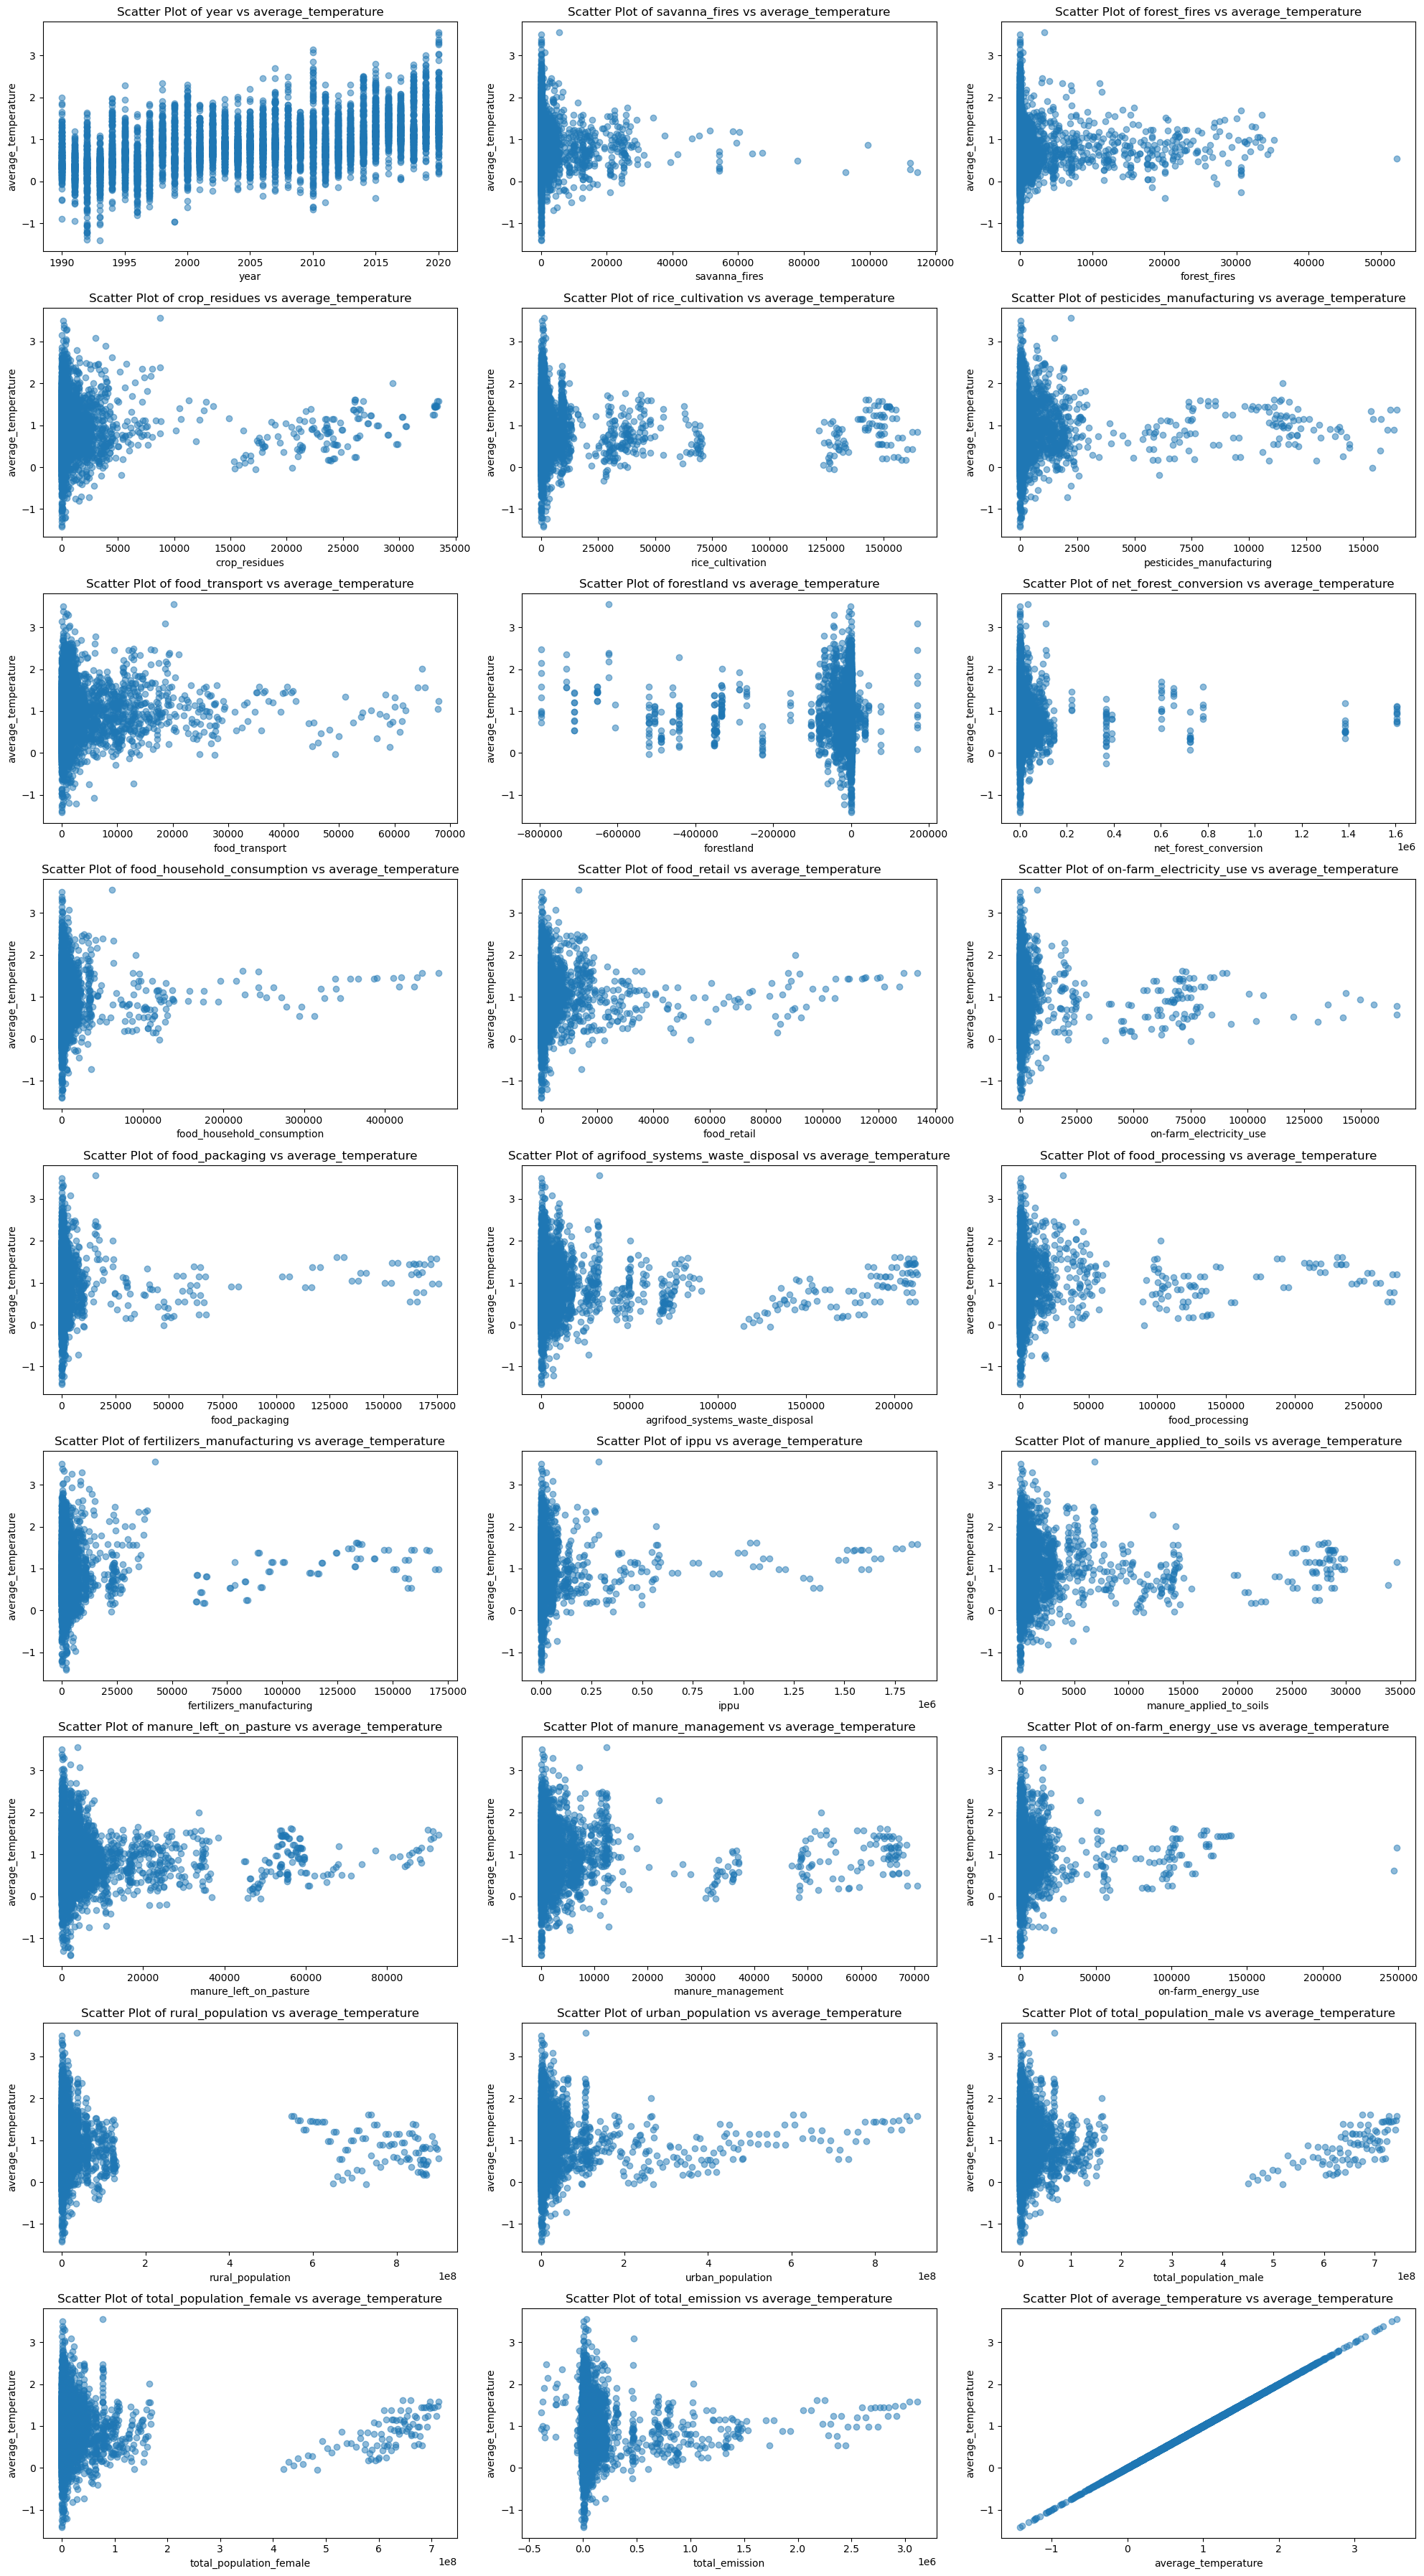

In [80]:
predictors = df.select_dtypes(include='number').columns  # Replace with your actual predictor column names
#print(predictors)
target = 'average_temperature'                  # Replace with your actual target variable name

# Number of subplots: one for each predictor
#num_predictors = len(predictors)
#fig, axes = plt.subplots(nrows=num_predictors, ncols=1, figsize=(6, 4 * num_predictors))

fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(20, 36))
axes = axes.flatten()

# Loop through each predictor and create a scatter plot
for i, predictor in enumerate(predictors):
    axes[i].scatter(df[predictor], df[target], alpha=0.5)
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel(target)
    axes[i].set_title(f'Scatter Plot of {predictor} vs {target}')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [83]:
#df_yearly_avg = df.groupby("year").mean().reset_index()
#df_yearly_avg.head()
df_yearly_avg.shape

(31, 27)

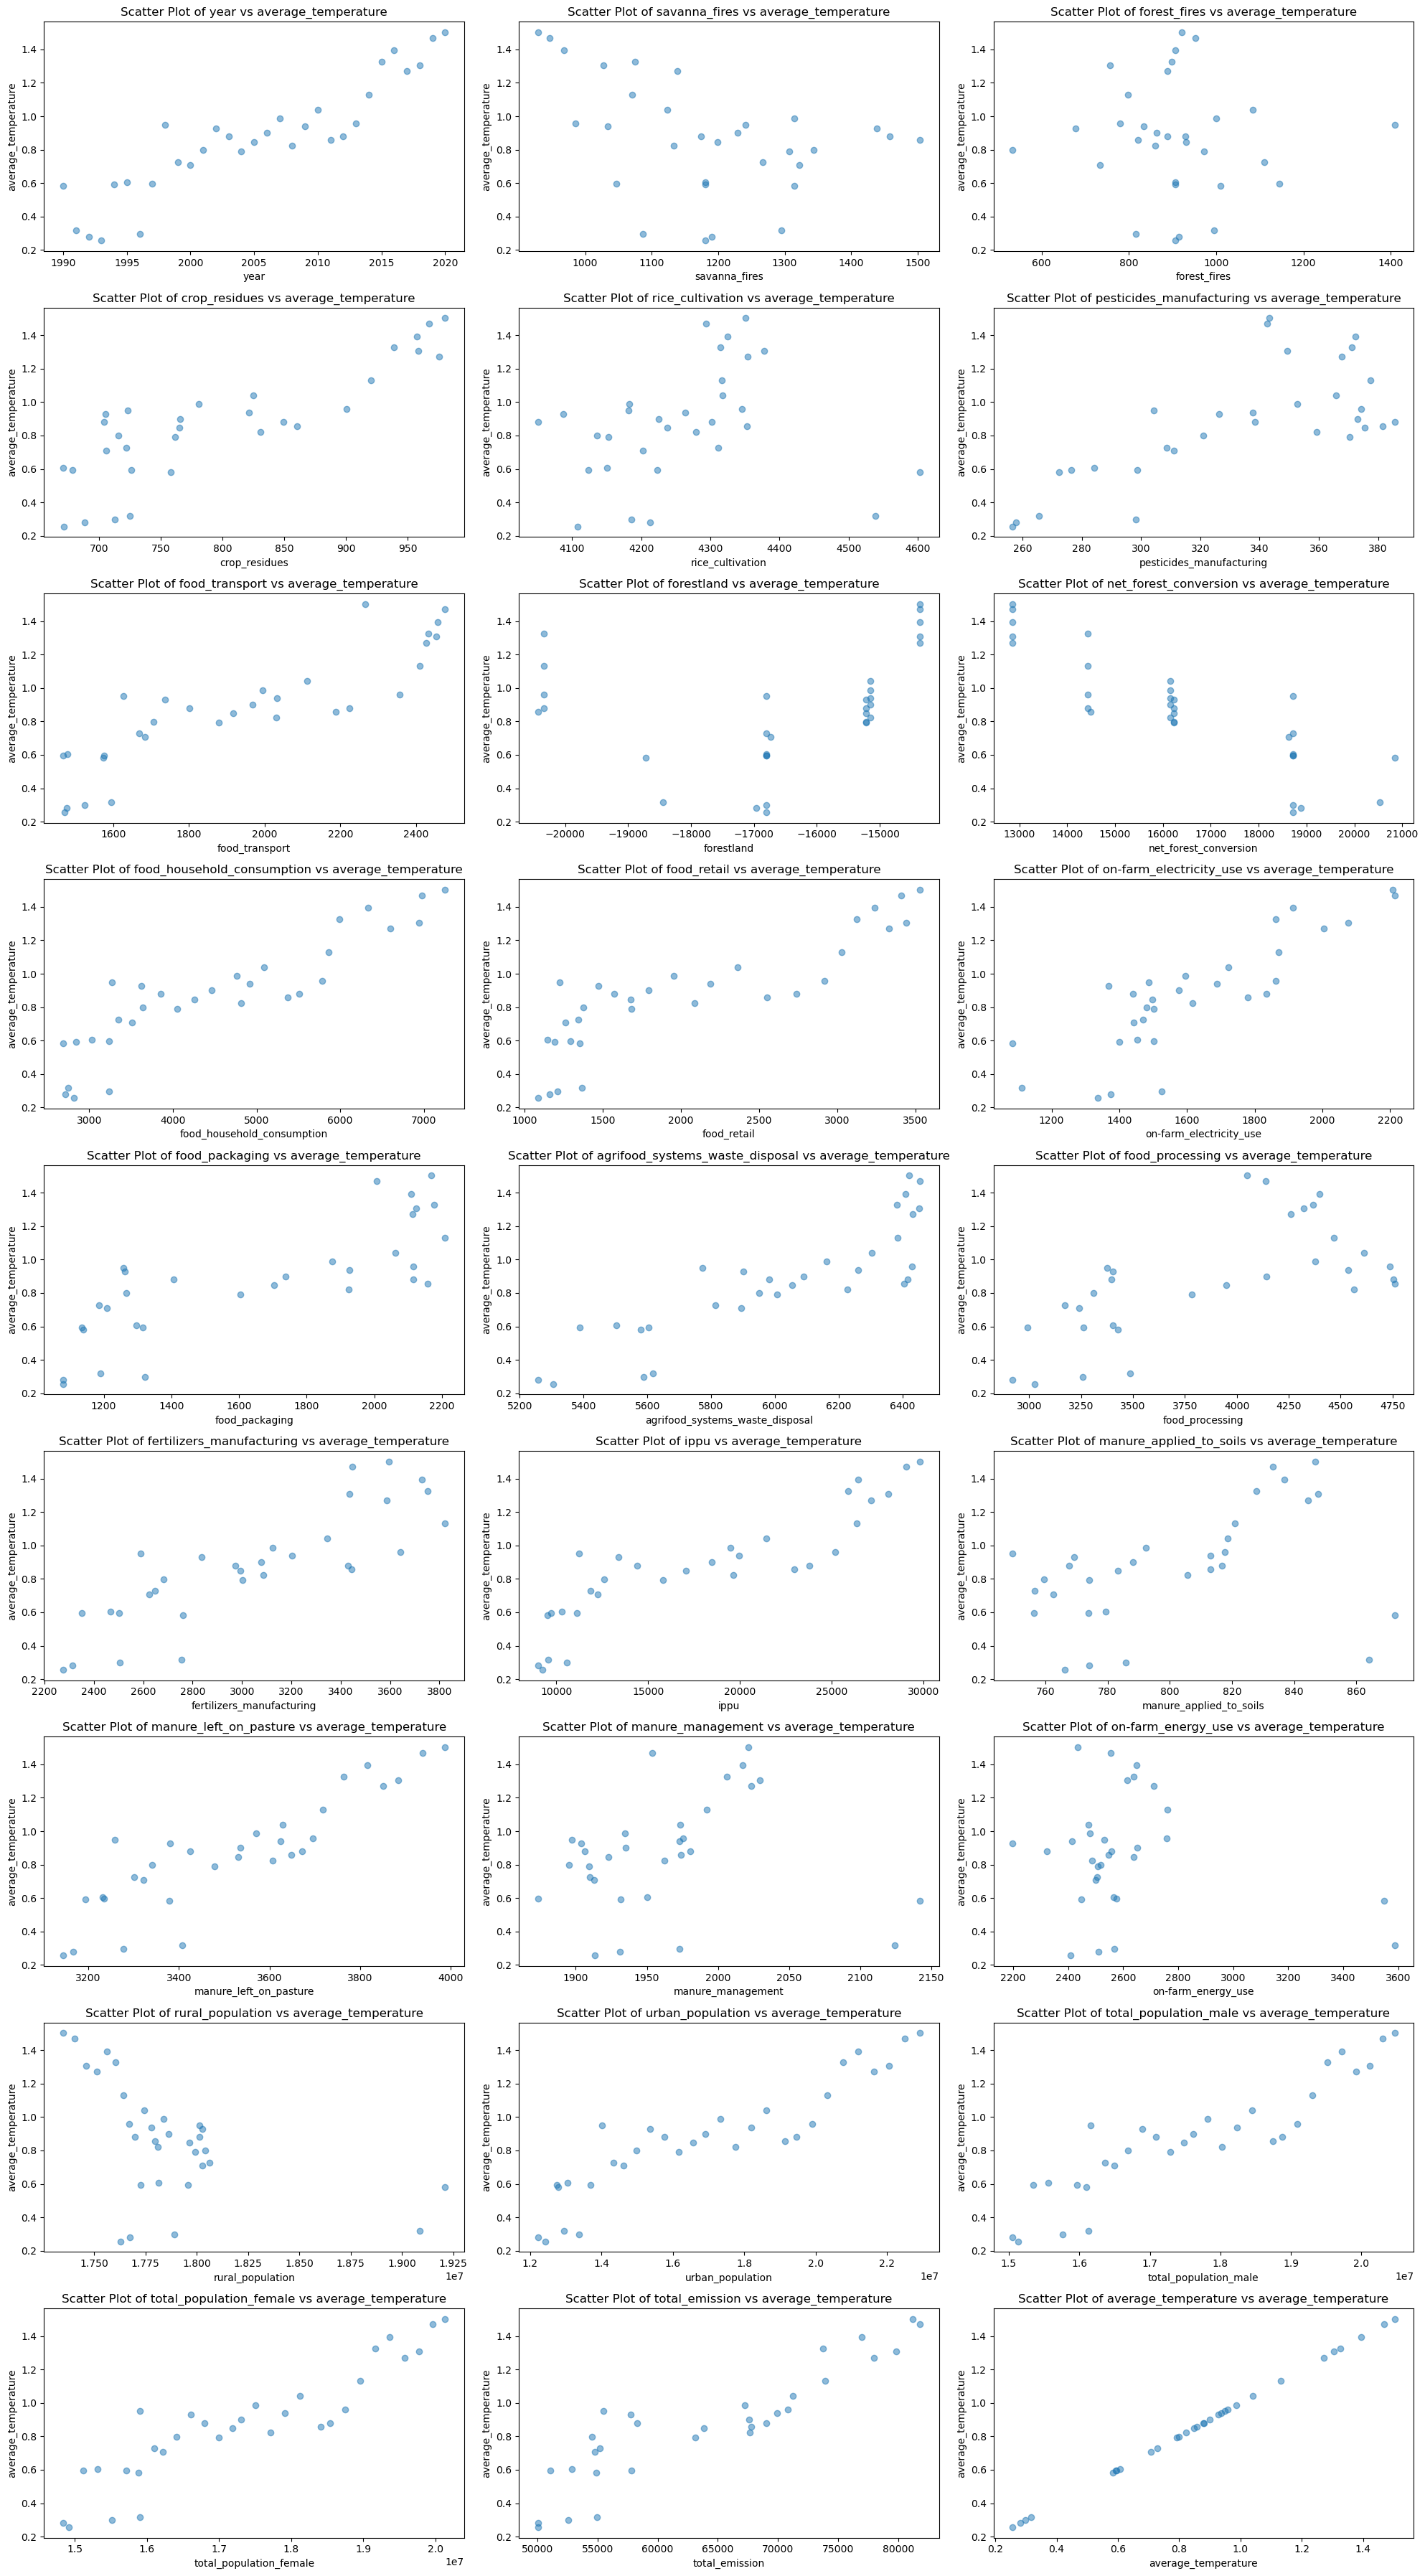

In [82]:
predictors = df_yearly_avg.select_dtypes(include='number').columns  # Replace with your actual predictor column names
#print(predictors)
target = 'average_temperature'                  # Replace with your actual target variable name

# Number of subplots: one for each predictor
#num_predictors = len(predictors)
#fig, axes = plt.subplots(nrows=num_predictors, ncols=1, figsize=(6, 4 * num_predictors))

fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(20, 36))
axes = axes.flatten()

# Loop through each predictor and create a scatter plot
for i, predictor in enumerate(predictors):
    axes[i].scatter(df_yearly_avg[predictor], df_yearly_avg[target], alpha=0.5)
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel(target)
    axes[i].set_title(f'Scatter Plot of {predictor} vs {target}')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

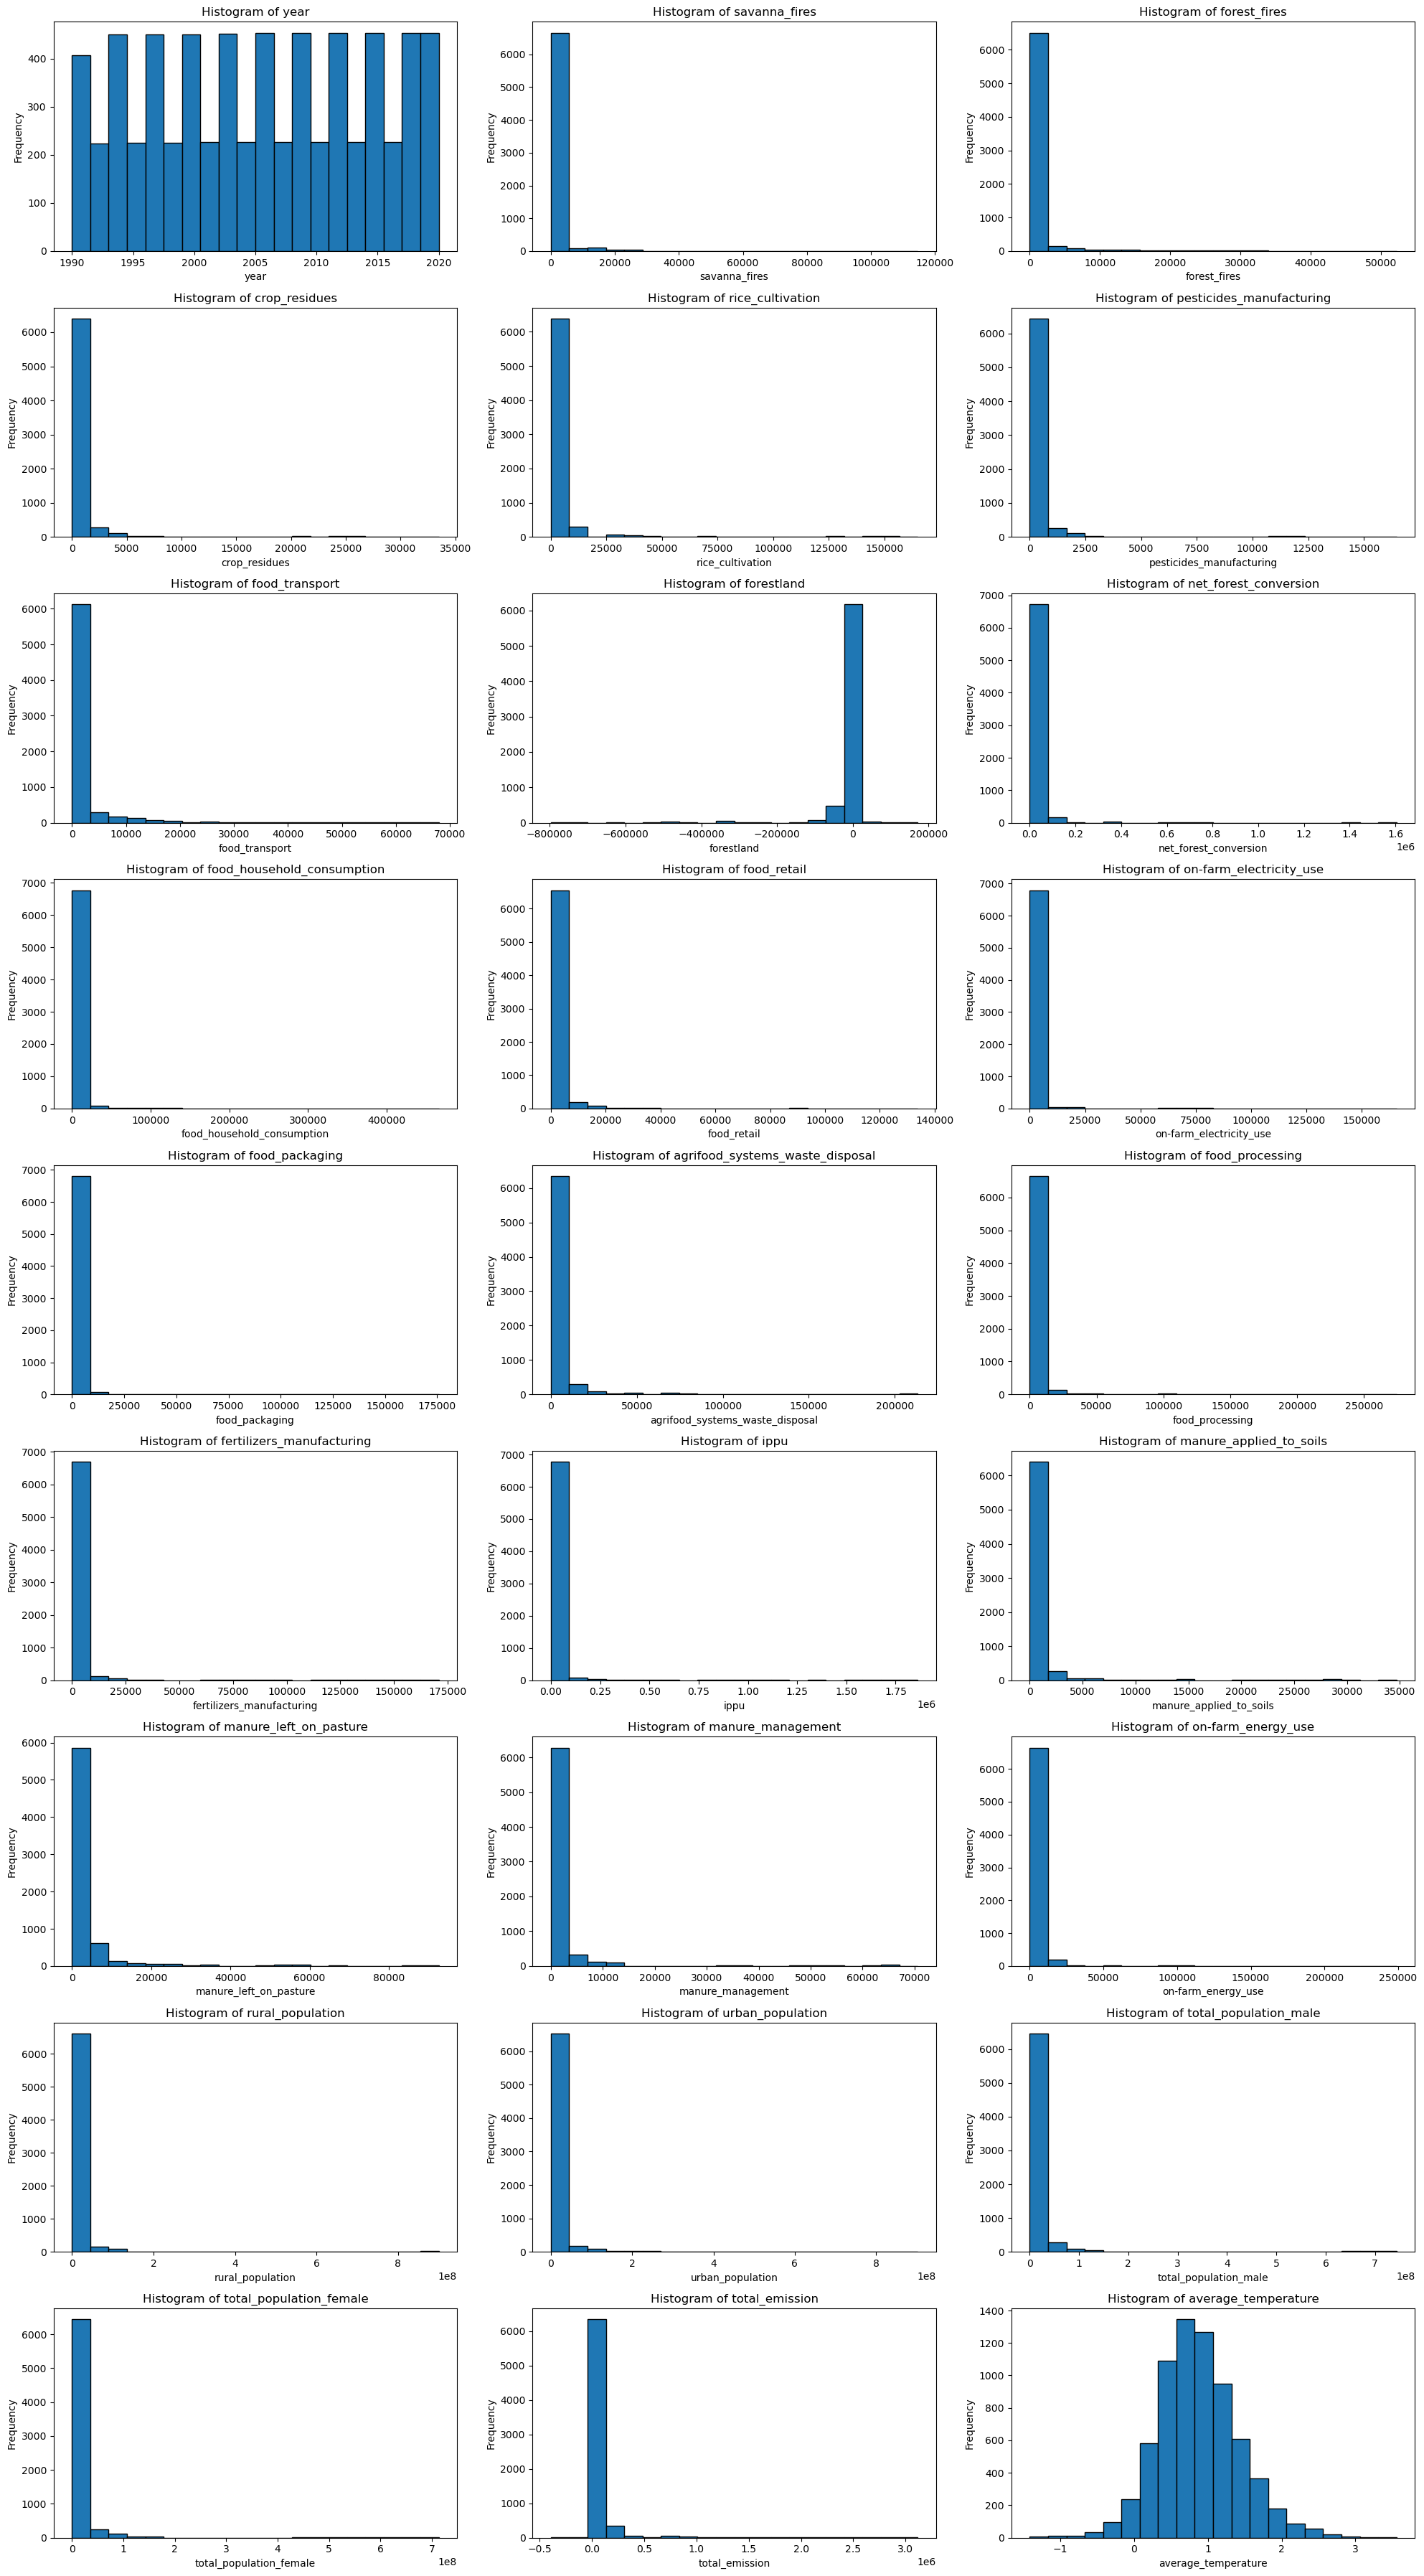

In [89]:
# plot histograms to see the spread of data
df_hist = df
df_hist = df_yearly_avg

predictors = df_hist.select_dtypes(include='number').columns
target = 'average_temperature'

fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(20, 36))
axes = axes.flatten()

# Loop through each predictor and create a histogram
for i, predictor in enumerate(predictors):
    axes[i].hist(df_hist[predictor], bins=20, edgecolor='black')
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {predictor}')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


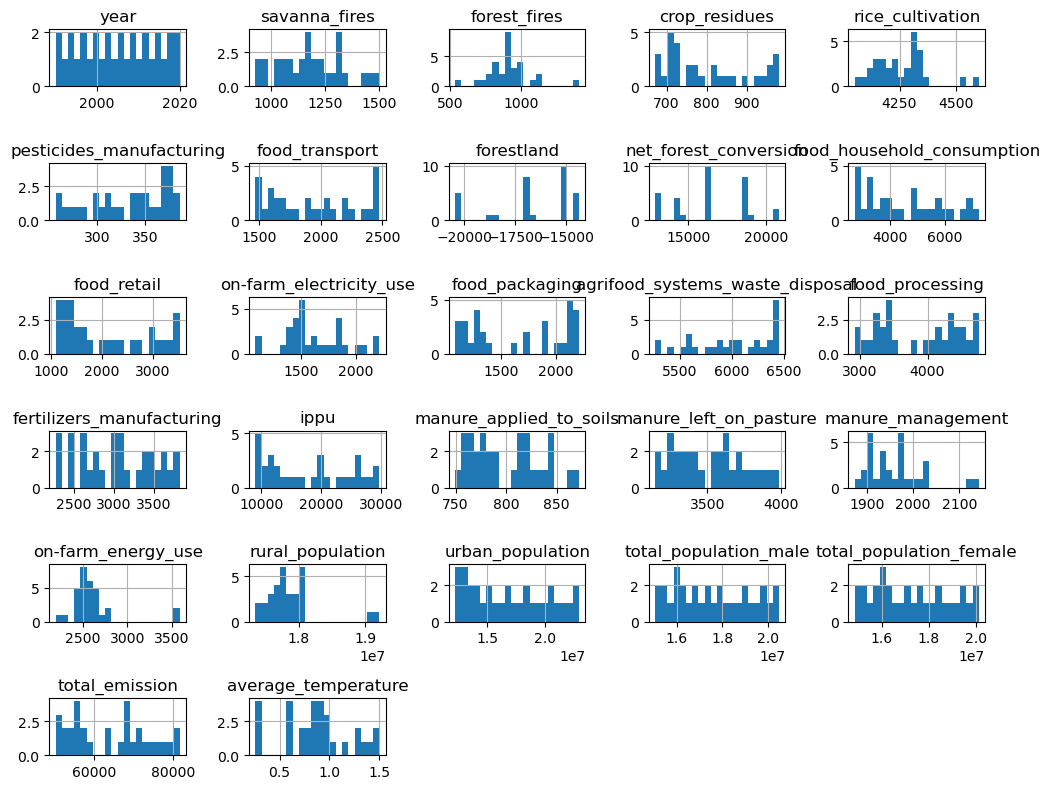

In [94]:
df_yearly_avg.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

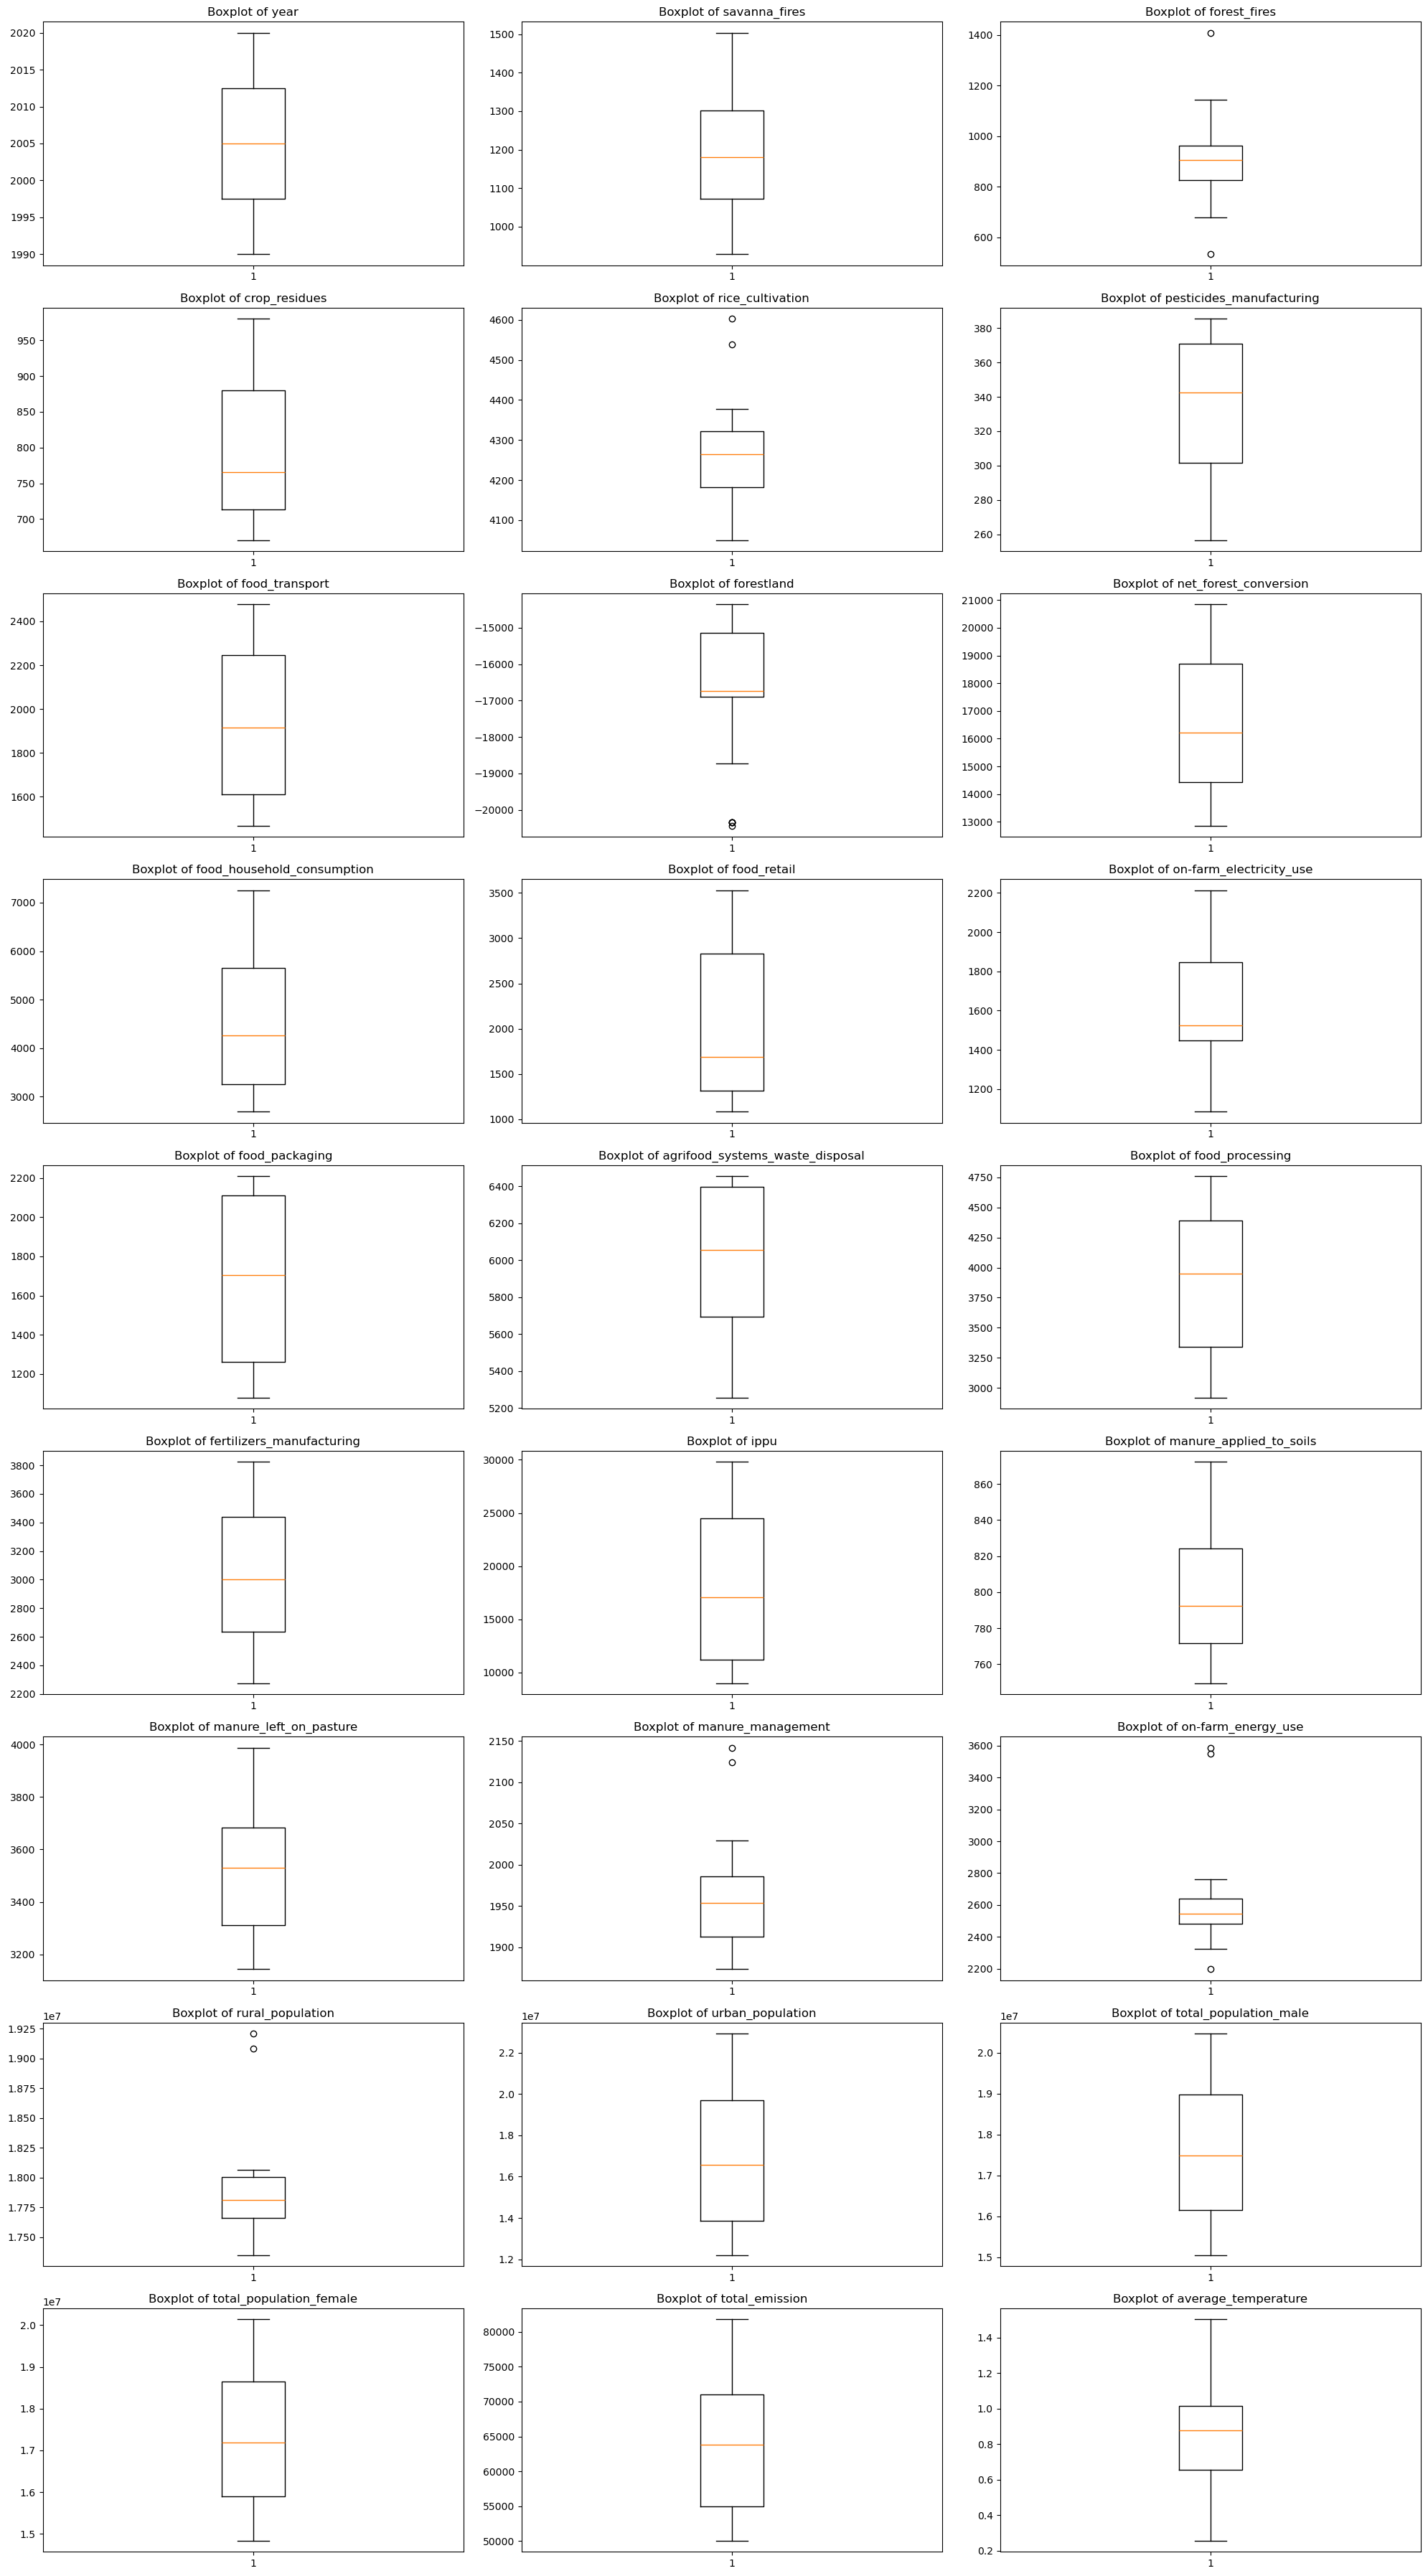

In [92]:


# boxplot to see the spread of data
#df_box = df
df_box = df_yearly_avg

predictors = df_box.select_dtypes(include='number').columns
# target = 'average_temperature'

fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(20, 36))
axes = axes.flatten()

# Loop through each predictor and create a histogram
for i, predictor in enumerate(predictors):
    axes[i].boxplot(df_box[predictor])
    # axes[i].set_xlabel(predictor)
    # axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Boxplot of {predictor}')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


## 6. Regression Models <a class="anchor" id="chapter6"></a>

### Feature Selection
Create data frames based on which features are selected. These will be used for modelling to assess the impact of features on the model performance

**df_28** - 28 features which comprise the original dataframe less 3 features that were discared due to zero values > 50% of column values

**df_24** - 24 features which comprise 28 featues above, less the 4 features that were manually identified as having high correlations with other features

**df_21** - 21 featues which comprisee 28 features above, less all features that had correlation values of > 0.95

**df_16** - 16 features which comprise 16 features which have the hightest correlation to the target variable, selected from 24 features above

In [10]:
# df_28 feature column selection

# same dataframe as the cleaned dataset
df_28 = df  
len(df_28.columns)

28

In [11]:
# df_24 feature column selection
columns_to_use = df.columns
columns_after_manual_selection = ['area', 'year', 'savanna_fires', 'forest_fires', 'crop_residues', 'rice_cultivation', \
                  'pesticides_manufacturing', 'food_transport', 'forestland', 'net_forest_conversion', \
                  'food_household_consumption', 'food_retail', 'on-farm_electricity_use', 'agrifood_systems_waste_disposal', \
                  'fertilizers_manufacturing', 'ippu', 'manure_applied_to_soils', 'manure_left_on_pasture', \
                  'on-farm_energy_use', 'rural_population', 'urban_population', 'total_population_female', \
                  'total_emission', 'average_temperature']
df_24 = df[df.columns.intersection(columns_after_manual_selection)]
len(df_24.columns)

24

In [12]:
# df_21 feature column selection

# create correlation matrix
corr_matrix = df.select_dtypes(include='float').corr().abs()

# select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# drop features 
df_21 = df.drop(to_drop, axis=1)
len(df_21.columns)

21

In [15]:
# df_16 feature column selection

df_16_cols = df_24.select_dtypes(include='number').corr().abs()['average_temperature'].sort_values(ascending=False).head(16).index.to_list()
df_16 = df_28[df_16_cols]
len(df_16.columns)

16

In [13]:
dataframe_desc = [{"df_28" : "Less three columns with zero values > 50%"}, \
                  {"df_24" : "less 4 features manually identified that have logical correlations"}, \
                  {"df_21" : "df_28 less all features withh corr() > 0.95"}]
print(dataframe_desc)

[{'df_28': 'Less three columns with zero values > 50%'}, {'df_24': 'less 4 features manually identified that have logical correlations'}, {'df_21': 'df_28 less all features withh corr() > 0.95'}]


### Linear Regression Model

It was noted during EDA that a weak linear relationship seemed to exist between the year feature and the average temperature target variable.

In [43]:
from sklearn.linear_model import LinearRegression

# Initialise the LinearRegression model
lm = LinearRegression()

X = df_28.year.values[:, np.newaxis]
y = df_28.average_temperature

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear model to the data
lm.fit(x_train, y_train)

# Extract the slope (coefficient) and intercept from the fitted model
m = lm.coef_[0]
c = lm.intercept_

# Print the slope and intercept
print("Slope:\t\t", m)
print("Intercept:\t", c)

Slope:		 0.033930004034701734
Intercept:	 -67.15826307926913


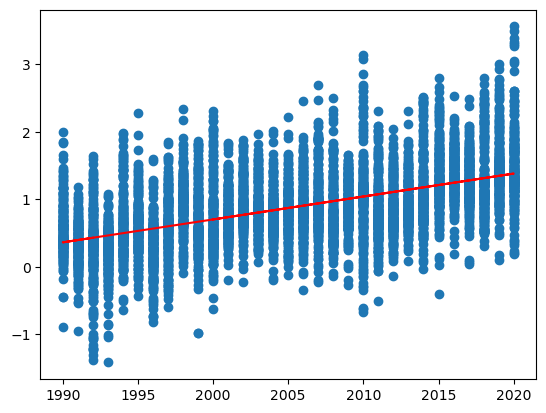

In [44]:
y_pred = lm.predict(x_test)

plt.scatter(X, y)
plt.plot(x_test, y_pred, color='red')
plt.show()

In [46]:
print("TRAIN METRICS")

y_train_pred = lm.predict(x_train)

# calculate and print the mean squared error (MSE) between the observed and predicted Y values
print('MSE:', round(metrics.mean_squared_error(y_train, y_train_pred),5))

# RMSE is the square root of mse
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)),5))

# RSS calculated by multiplying the MSE by the number of observations
print("Residual sum of squares:", round(metrics.mean_squared_error(y_train, y_train_pred) * len(x_test),5))

# R-squared value, a measure of how well the observed values are replicated by the model
print('R_squared:', round(metrics.r2_score(y_train, y_train_pred),5))

TRAIN METRICS
MSE: 0.21855
RMSE: 0.46749
Residual sum of squares: 304.43867
R_squared: 0.29399


In [41]:
print("TEST METRICS")
# calculate and print the mean squared error (MSE) between the observed and predicted Y values
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred),5))

# RMSE is the square root of mse
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))

# RSS calculated by multiplying the MSE by the number of observations
print("Residual sum of squares:", round(metrics.mean_squared_error(y_test, y_pred) * len(x_test),5))

# R-squared value, a measure of how well the observed values are replicated by the model
print('R_squared:', round(metrics.r2_score(y_test, y_pred),5))

TEST METRICS
MSE: 0.21043
RMSE: 0.45872
Residual sum of squares: 293.1222
R_squared: 0.31362


In [40]:
round(metrics.mean_absolute_error(y_test, y_pred), 2)

0.35

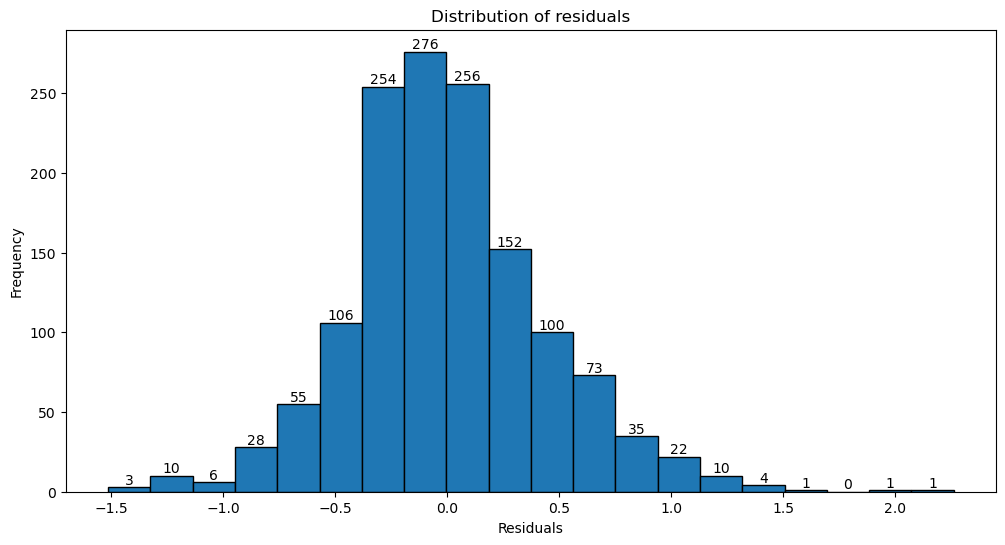

In [71]:
# plotting a histogram of the residuals
residuals = y_test - y_pred # calculating the residuals
residuals = np.array(residuals)

plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(residuals, bins=20, edgecolor='black')

# Add the bin values (counts) on top of each bar
for count, patch in zip(counts, patches):
    # Get the x and y position for the text
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    plt.text(x, y, str(int(count)), ha='center', va='bottom')  # Display the count

plt.title('Distribution of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()





In [73]:
num_residuals = len(residuals)
gt_0 = len([val for val in residuals if val > 0])
lt_0 = len([val for val in residuals if val < 0])

print("> 0: ", gt_0, " %: ", round(gt_0 / num_residuals * 100, 2))
print("< 0: ", lt_0, " %: ", round(lt_0 / num_residuals * 100, 2))
print("= 0: ", len([val for val in residuals if val == 0]))

> 0:  648  %:  46.52
< 0:  745  %:  53.48
= 0:  0


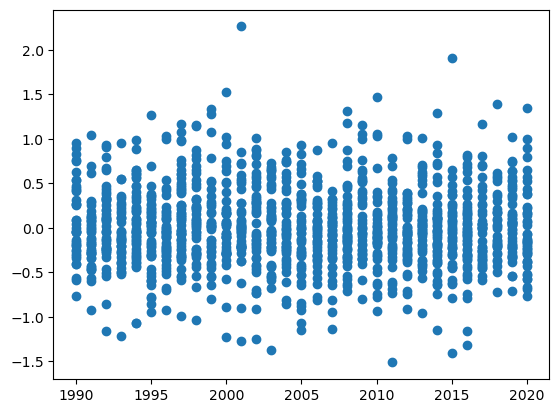

In [74]:
plt.scatter(x_test, residuals)
# plt.plot(x_test, y_pred, color='red')
plt.show()

### Scale Features
Function provided for scaling the features using Standard Scaling. Can be used if a particular model requires scaling

In [20]:
def scale_features(df, drop_cols):

    # select features for scaling
    features = df.drop(drop_cols, axis=1)

    # implement standard scaling
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # convert scaled features back to DataFrame for display
    scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

    return scaled_features_df

In [21]:
# Lasso
df_scaled_features = scale_features(df_28, ['average_temperature', 'area'])
X = df_scaled_features
y = df_28['average_temperature']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LASSO regression model with cross-validation
lasso_regressor = LassoCV(cv=5, random_state=42)
lasso_regressor.fit(X_train, y_train)

# Evaluate the model
y_pred_lasso = lasso_regressor.predict(X_test)
r2_lasso = metrics.r2_score(y_test, y_pred_lasso)
features_used = np.sum(lasso_regressor.coef_ != 0)

print(f"Optimal regularisation parameter: {lasso_regressor.alpha_}")
print(f"R-squared value on the test set: {r2_lasso}")
print(f"Number of features used: {features_used}")

# Extract coefficient from model
coeff = pd.DataFrame(lasso_regressor.coef_, X.columns, columns=['Coefficient'])
coeff

Optimal regularisation parameter: 0.0003015674060178604
R-squared value on the test set: 0.3332546438820043
Number of features used: 21


,Coefficient
year,0.310831
savanna_fires,-0.007066
forest_fires,-0.018387
crop_residues,0.000000
rice_cultivation,-0.058005
pesticides_manufacturing,-0.043031
food_transport,0.068553
forestland,-0.007184
net_forest_conversion,0.027972
food_household_consumption,0.024661


In [22]:
# Random Forest
def train_rf_model(df, target_var, estimators, max_depth=5):
    y = df[target_var]
    X = df.drop(target_var, axis=1)
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
    
    # create the forest regressor
    forest = RandomForestRegressor(n_estimators=estimators, max_depth=max_depth, random_state=42)
    
    # fit to scaled data
    forest.fit(X_train, y_train)
    
    # get y predict
    y_pred = forest.predict(X_test)
    
    # evaluate
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    
    return forest, rmse, r2

df_forest = df_28.drop('area', axis=1)
model, rmse, r2  = train_rf_model(df_forest, 'average_temperature', 200)
print(f"RMSE: ", rmse )
print(f"R squared", r2)

RMSE:  0.4059967603425686
R squared 0.4562449024271774


In [23]:
# run df_28 random forest on differing number of estimators
results = {}
for est in [50, 100, 200, 225, 250]:
    model, rmse, r2  = train_rf_model(df_forest, 'average_temperature', est)
    results[str(est) + " trees"] = "{RMSE: " + str(rmse) + ", R2: " + str(r2) +"}"
    
results
# insight - 200 estimators performed best on r2

{'50 trees': '{RMSE: 0.4073451451945092, R2: 0.4526270968917302}',
 '100 trees': '{RMSE: 0.4061845708688115, R2: 0.4557417134287206}',
 '200 trees': '{RMSE: 0.4059967603425686, R2: 0.4562449024271774}',
 '225 trees': '{RMSE: 0.40601186670266426, R2: 0.45620443750761785}',
 '250 trees': '{RMSE: 0.40609021800909284, R2: 0.4559945362344827}'}

In [24]:
# RF df_28 with dummy encoded vars...
df_28_encoded = pd.get_dummies(df_28, drop_first=True)
df_forest = df_28_encoded
model, rmse, r2  = train_rf_model(df_forest, 'average_temperature', 200)
print(f"RMSE: ", rmse )
print(f"R squared", r2)
# insight - the feature set without the dummy encoded variables performed better

RMSE:  0.40819616130403813
R squared 0.450337590032592


In [25]:
# RF with df_24
df_forest = df_24.drop('area', axis=1)
model, rmse, r2  = train_rf_model(df_forest, 'average_temperature', 200)
print(f"RMSE: ", rmse )
print(f"R squared", r2)
#insight - df_28 (more features) performed better than df_24

RMSE:  0.40615198760913535
R squared 0.45582902840360595


In [26]:
# RF df_24 with dummy encoded vars...
results = {}
for est in [50, 100, 200, 225, 250]:
    model, rmse, r2  = train_rf_model(df_forest, 'average_temperature', est)
    results[str(est) + " trees"] = "{RMSE: " + str(rmse) + ", R2: " + str(r2) +"}"
    
results
# insight - df_28 performed better

{'50 trees': '{RMSE: 0.40741936758033226, R2: 0.45242760501298074}',
 '100 trees': '{RMSE: 0.40635729040448737, R2: 0.4552787513583382}',
 '200 trees': '{RMSE: 0.40615198760913535, R2: 0.45582902840360595}',
 '225 trees': '{RMSE: 0.40615880501221113, R2: 0.45581076005035837}',
 '250 trees': '{RMSE: 0.40624552821514004, R2: 0.4555783441985817}'}

In [27]:
# RF with df_21
df_forest = df_21.drop('area', axis=1)
model, rmse, r2  = train_rf_model(df_forest, 'average_temperature', 200)
print(f"RMSE: ", rmse )
print(f"R squared", r2)
# insight df_24, and df_28 performed better than df_21

RMSE:  0.40712406753556474
R squared 0.4532210849783983


In [28]:
from sklearn.svm import SVR

def train_svm_model(df, target_var):
    y = df[target_var]
    X = df.drop(target_var, axis=1)
    
    # standardise x values (features)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(np.array(X))
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=6)
    
    # create the SVM regressor
    sv_reg = SVR(kernel='rbf', gamma='auto')

    # fit model
    sv_reg.fit(X_train, y_train)

    
    # get y predict
    y_pred = sv_reg.predict(X_test)
    
    # evaluate
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    
    return sv_reg, rmse, r2



In [29]:
# SVM with df_28
df_svm = df_28.drop('area', axis=1)
model, rmse, r2  = train_svm_model(df_svm, 'average_temperature')
print(f"RMSE: ", rmse )
print(f"R squared", r2)
#insight - SVM performed poorer than RF

RMSE:  0.4442175609864247
R squared 0.34904697183217104


In [32]:
# RF with df_28, max_depth=14, estimators 220
df_forest = df_28.drop('area', axis=1)
model, rmse, r2  = train_rf_model(df_forest, 'average_temperature', 220, max_depth=14)
print(f"RMSE: ", rmse )
print(f"R squared", r2)
#insight - this is best performing model so far

RMSE:  0.36062338108344477
R squared 0.5709914310029924


In [33]:
# RF with df_16, max_depth 13, estimators 220
df_forest = df_16
model, rmse, r2  = train_rf_model(df_forest, 'average_temperature', 220, max_depth=13)
print(f"RMSE: ", rmse )
print(f"R squared", r2)
#insight - df_28 still best

RMSE:  0.36131723005182986
R squared 0.5693389950911107


In [136]:
from sklearn.model_selection import RandomizedSearchCV

df = df_28.drop('area', axis=1)
y = df['average_temperature']
X = df.drop('average_temperature', axis=1)
    
# train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid to search
param_dist = {
    'n_estimators': [200, 210, 220, 235, 250],  # Number of trees in the forest
    'max_depth': [5, 10, 15],     # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],             # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples at each leaf
    'max_features': ['sqrt', 'log2'],    # Number of features to consider at each split
    'bootstrap': [True, False]                   # Use bootstrapping or not
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=25,  # Number of parameter settings sampled
    cv=5,       # 5-fold cross-validation
    scoring='r2',
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Assume X and y are your feature matrix and target vector
# Fit the randomized search on the data
random_search.fit(X, y)

# Print the best parameters and the best R-squared score found
print("Best parameters found:", random_search.best_params_)
print("Best R-squared score:", random_search.best_score_)


Best parameters found: {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': False}
Best R-squared score: 0.4149728098377105


In [134]:
results = random_search.cv_results_
display(results)

{'mean_fit_time': array([2.89430618e-03, 2.54073143e-03, 2.92439981e+00, 3.35306211e+00,
        3.50149040e+00, 1.50965457e+00, 4.82893257e+00, 9.73941870e+00,
        3.28418889e+00, 6.28015866e+00, 6.57273698e+00, 2.14958191e-03,
        3.44775748e+00, 2.39048004e-03, 1.24273615e+00, 2.53114700e-03,
        5.27861619e+00, 1.40989313e+00, 4.88272061e+00, 6.78349080e+00]),
 'std_fit_time': array([5.97462471e-04, 2.76880151e-04, 2.80824999e-01, 3.45548371e-01,
        3.03415334e-01, 1.04072311e-01, 1.40065928e-01, 3.63042714e-01,
        1.60097777e-01, 2.42257629e-01, 3.16170221e-01, 2.95283388e-04,
        1.86446181e-01, 3.64899354e-04, 3.69639165e-02, 6.75111862e-04,
        2.29682969e-01, 3.09420395e-02, 2.71701402e-01, 2.89025470e-01]),
 'mean_score_time': array([0.        , 0.        , 0.01535263, 0.02581887, 0.02775202,
        0.0117651 , 0.02846098, 0.06011105, 0.02325497, 0.04319344,
        0.04526839, 0.        , 0.02508955, 0.        , 0.01545773,
        0.        , 

In [48]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

df = df_28.drop('area', axis=1)
y = df['average_temperature']
X = df.drop('average_temperature', axis=1)

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Define hyperparameters for tuning (optional but can help in practice)
# You could also use GridSearchCV or RandomizedSearchCV for hyperparameter tuning
params = {
    'n_estimators': 100,        # Number of boosting stages to perform
    'learning_rate': 0.1,       # Step size at each iteration
    'max_depth': 3,             # Maximum depth of individual estimators
    'min_samples_split': 2,     # Minimum samples to split a node
    'min_samples_leaf': 1       # Minimum samples at a leaf node
}

# Apply parameters to the model
gbr.set_params(**params)

# Assume X and y are your feature matrix and target vector
# Perform 5-fold cross-validation and evaluate with R-squared score
cv_scores = cross_val_score(gbr, X, y, cv=5, scoring='r2', n_jobs=-1)

# Print cross-validation scores and mean score
print("Cross-validation R-squared scores:", cv_scores)
print("Mean R-squared score:", np.mean(cv_scores))

Cross-validation R-squared scores: [0.39757686 0.37681925 0.36163811 0.42877389 0.45357417]
Mean R-squared score: 0.40367645883365


In [52]:
#ADA Boost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

df = df_28.drop('area', axis=1)
y = df['average_temperature']
X = df.drop('average_temperature', axis=1)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Initialize a base estimator (e.g., Decision Tree)
base_estimator = DecisionTreeRegressor(max_depth=3)

# Initialize the AdaBoost Regressor with the base estimator
abr = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, learning_rate=0.1, random_state=42)

# fit model
abr.fit(X_train, y_train)

# get y predict
y_pred = abr.predict(X_test)

# evaluate
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"RMSE: ", rmse )
print(f"R squared", r2)

RMSE:  0.43672724190683415
R squared 0.37081440508880115


In [53]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


# Initialize a base estimator (e.g., Decision Tree)
base_estimator = DecisionTreeRegressor(max_depth=3)

# Initialize the AdaBoost Regressor with the base estimator
abr = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, learning_rate=0.1, random_state=42)

# Assume X and y are your feature matrix and target vector
# Perform 5-fold cross-validation and evaluate with R-squared score
cv_scores = cross_val_score(abr, X, y, cv=5, scoring='r2', n_jobs=-1)

# Print cross-validation scores and mean score
print("Cross-validation R-squared scores:", cv_scores)
print("Mean R-squared score:", np.mean(cv_scores))

Cross-validation R-squared scores: [0.35114446 0.35839782 0.33045815 0.35208706 0.38084415]
Mean R-squared score: 0.35458632765769293


## 7. Conclusion <a class="anchor" id="chapter7"></a>